<a href="https://colab.research.google.com/github/fajrinovi/Superstore-Sales-Analysis/blob/main/Superstore_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Understanding

We assist a US-based superstore to identifying the most effective strategies for maximizing their sales and profits. To achieve this, we will utilize exploratory data analysis (EDA) techniques to uncover key insights, including:

*   Determining the top-performing and least profitable product categories
*   Conducting a segment analysis of sales and profits
*   Analyzing sales and profits by region


By leveraging the insights gained through EDA, the superstore will be able to make informed decisions about how to optimize their business operations. For example, they may choose to discontinue non-profitable products or increase their marketing efforts in product categories, customer segments, or geographical areas that are driving the most profit.

### Import Libraries

In [ ]:
from matplotlib import ticker as mtick
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Data Understading

### Import Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/superstore analysis/Superstore.csv", encoding='cp1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#Converting to date time
df["Order Date"], df["Ship Date"] = pd.to_datetime(df["Order Date"]), pd.to_datetime(df["Ship Date"])

In [ ]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [ ]:
days = (df['Order Date'].max() - df['Order Date'].min()).days
days

1457

In [ ]:
# total Sales
total_sales = round(sum(df['Sales']), 2)
total_sales

2297200.86

In [ ]:
# total Quantity sold
total_quantity = sum(df['Quantity'])
total_quantity

37873

In [ ]:
# total Profit
total_profit = round(sum(df['Profit']), 2)
total_profit

286397.02

In [ ]:
print(f"""The data provided by the superstore covers a period of {days} days, during which they generated total sales of ${total_sales :,.0f} and profits of ${total_profit :,.0f}.
Their inventory consists of {df['Product ID'].nunique()} unique items, categorized into {df['Category'].nunique()} categori, and sold across {df["State"].nunique()} US states.""")

The data provided by the superstore covers a period of 1457 days, during which they generated total sales of $2,297,201 and profits of $286,397.
Their inventory consists of 1862 unique items, categorized into 3 categori, and sold across 49 US states.


### Cleaning the Data

In [ ]:
#First lets clean the column names so it's all in snakecase and no whitespace.
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [ ]:
#Dropping some redundant columns (for this analysis)
df = df.drop(columns=["row_id", "customer_name"])

In [ ]:
#There is one duplicated entry in the dataset. Let's check it out
df[df.duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [ ]:
#Given the structure of the dataset I will assume that this is a faulty entry.
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

order_id        0
order_date      0
ship_date       0
ship_mode       0
customer_id     0
segment         0
country         0
city            0
state           0
postal_code     0
region          0
product_id      0
category        0
sub-category    0
product_name    0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

## Product Analysis

<ipython-input-36-22903a2cff07>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_category = df.groupby("category").sum()


Text(0.0, 1.0, 'Share of Total Revenue by Category')

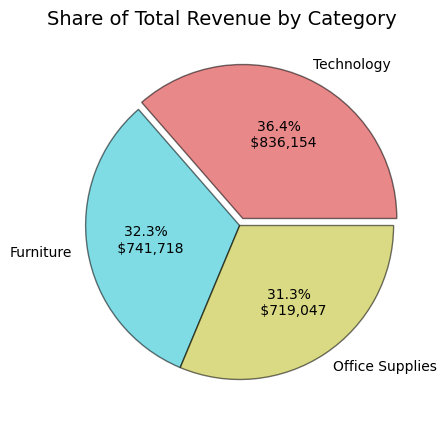

In [ ]:
# Grouping the data based on category
sales_by_category = df.groupby("category").sum()

# Sorting the sales data in descending order
sales_sorted = sales_by_category.sort_values(by='sales', ascending=False)

# Getting a list of colors. This will help other charts use the same colors given the label texts.
category_colors = ["tab:cyan" if label == "Furniture" else "tab:olive" if label == "Office Supplies" else "tab:red" for label in sales_sorted.index]

# Creating the first pie chart of sales per category
fig, ax1 = plt.subplots(figsize=(5, 5))

# Exploding only the first slice
explode = [0.05 if i == 0 else 0 for i in range(len(sales_sorted))]

ax1.pie(sales_sorted["sales"], labels=sales_sorted.index,
      autopct=lambda p:f"{p:.1f}% \n ${p*np.sum(sales_sorted['sales'])/100 :,.0f}",
      wedgeprops={"linewidth": 1, "edgecolor":"black", "alpha":0.55},
      colors=category_colors, explode=explode)

# Setting the title
ax1.set_title("Share of Total Revenue by Category", loc="left", fontdict={"fontsize":14})

<ipython-input-28-39cd7a50f113>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_category = df.groupby("category").sum()


Text(0.0, 1.0, 'Share of Total Profit by Category')

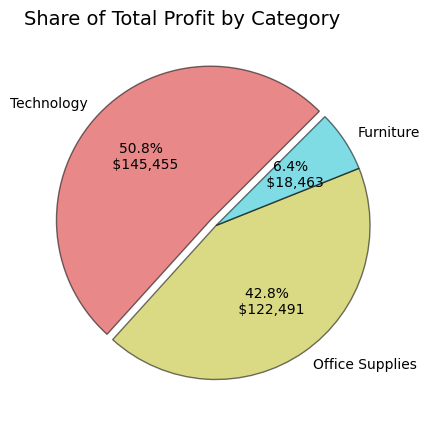

In [ ]:
# Grouping the data based on category
sales_by_category = df.groupby("category").sum()

# Sorting the data by profit in descending order
sales_by_category = sales_by_category.sort_values("profit", ascending=False)

# Getting a list of colors. This will help other charts use the same colors given the label texts.
category_colors = ["tab:cyan" if label == "Furniture" else "tab:olive" if label == "Office Supplies" else "tab:red" for label in sales_by_category.index]

# Creating the second pie chart of profit per category
fig, ax2 = plt.subplots(figsize=(5, 5))

# Exploding the first slice (which will be the one with the highest profit)
explode = [0.05 if i == 0 else 0 for i in range(len(sales_by_category))]

ax2.pie(sales_by_category["profit"], labels=sales_by_category.index,
       autopct=lambda p: f"{p:.1f}% \n ${p*np.sum(sales_by_category['profit'])/100 :,.0f}",
        startangle=45, wedgeprops={"linewidth": 1, "edgecolor":"black", "alpha":0.55},
        colors=category_colors, explode=explode)

# Setting the title
ax2.set_title("Share of Total Profit by Category",loc="left", fontdict={"fontsize":14})


From the pie charts we made, we can see that the sales are almost equally divided between the three product categories, which are Furniture, Office Supplies, and Technology. But when we look closer at the profit made from each category, we notice that the profit margin for Furniture is lower compared to Office Supplies and Technology. This means that even though Furniture makes a significant amount of sales, it doesn't generate as much profit as the other two categories. 

Therefore, we will now explore the sub-categories and their respective profit margins to gain a deeper understanding.

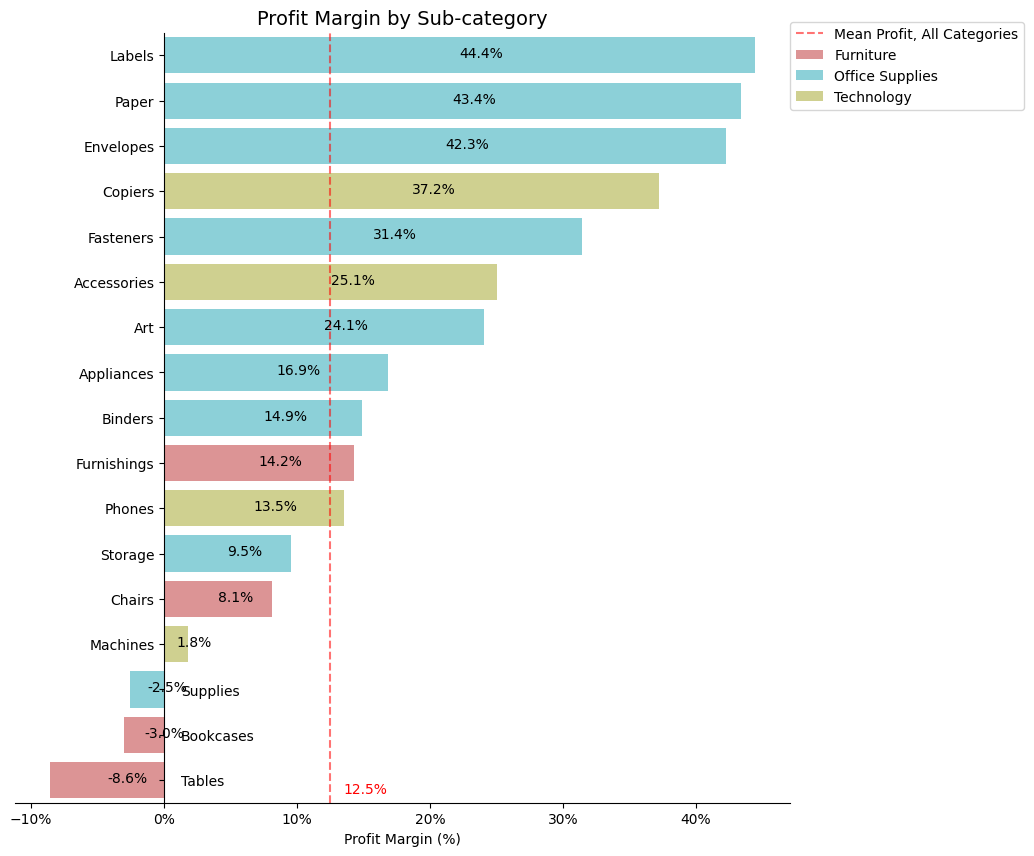

In [ ]:
#Grouping the data on category and it's respective sub-categories. Calculating the profit margin.
sales_per_subcategory = df.groupby(["category", "sub-category"], as_index=False)[["sales", "profit"]].sum()
sales_per_subcategory["profit_margin"] = sales_per_subcategory["profit"] / sales_per_subcategory["sales"]

#Sorting the dataframe based on profit margin
sales_per_subcategory.sort_values(by="profit_margin", inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(10,10))

# Getting a list of colors. This will help other charts use the same colors given the label texts.
category_colors = ["tab:cyan" if label == "Furniture" else "tab:olive" if label == "Office Supplies" else "tab:red" for label in sales_sorted.index]

#Plotting the profit margin per sub-category.
sns.barplot(y=sales_per_subcategory["sub-category"], x=sales_per_subcategory["profit_margin"], hue=sales_per_subcategory["category"], 
            hue_order=["Furniture", "Office Supplies", "Technology"], alpha=0.55, dodge=False,
           ax=ax, palette=category_colors)

#Cleaning out bar junk
ax.spines["left"].set_position("zero")
ax.spines[["right","top"]].set_visible(False)
ax.set(ylabel=None, xlabel="Profit Margin (%)")


def move_ylabel_tick(index: list):
    """
    Moving the provided ylabel ticks
    """
    for tick in index:
        ax.get_yticklabels()[tick].set_x(0.02)
        ax.get_yticklabels()[tick].set_horizontalalignment("left")

#Moving the y-labels on sub-categories that are making a loss in order to prevent collision of the bar and the text.
move_ylabel_tick([-1, -2, -3])


#Annotating the profit margin amount for each bar.
for p in ax.patches:
    _, y = p.get_xy()
    
    ax.annotate(f"{p.get_width()*100 :.1f}%", (p.get_width() / 2, y+0.45))
    
#Calculating Superstore's aggregate profit margin in order to compare it to each sub-category's profit margin
mean_profit = sales_per_subcategory["profit"].sum() / sales_per_subcategory["sales"].sum()

#Plotting a vertical line and annotating the Superstore's aggregate profit margin.
ax.axvline(mean_profit, color="red", label="Mean Profit, All Categories", alpha=0.55, ls="--")
ax.text(x=mean_profit+0.01, y=len(sales_per_subcategory)-0.7, s=f"{mean_profit*100 :.1f}%", color="red")

#Setting the title and legend.
ax.set_title("Profit Margin by Sub-category", fontdict={"fontsize":14})
ax.legend(loc=(1, 0.9))

#Formatting the x-axis as %
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

The chart shows that some sub-categories have a higher profit margin than others. Office Supplies has the highest profit margin. In contrast, Furniture has a low profit margin, and two of its sub-categories are even being sold at a loss. Technology is somewhere in the middle.
Let's focus on the three sub-categories where the company is losing money and examine the items being sold within those sub-categories.

In [ ]:
#Creating a dataframe for each sub-category and it's respective products.
tables = df.groupby(["sub-category", "product_name"]).sum().loc["Tables",:]
bookcases = df.groupby(["sub-category", "product_name"]).sum().loc["Bookcases",:]
supplies = df.groupby(["sub-category", "product_name"]).sum().loc["Supplies",:]


def profit_margin(category_df):
    """
    Function to calculate the profit margin for all the provided dataframes
    """
    
    category_df["profit_margin"] = category_df["profit"] / category_df["sales"]
    
    category_df.sort_values(by="profit_margin", inplace=True, ascending=False)
    
    return category_df

#Calculating profit margin for all dataframes.
profit_margin(tables)
profit_margin(bookcases)
profit_margin(supplies)

#
def profitable_items(category_dict: dict):
    """
    Function to print the amount of items that have a higher profit margin than the company average
    """
    
    for df_name, df in category_dict.items():

        print(f"""{df_name} has {len(df[df['profit_margin'] > mean_profit])} items (out of {len(df)}) with a profit margin higher than the company average.""")
    
profitable_items({"Tables":tables, "Bookcases":bookcases, "Supplies":supplies})


<ipython-input-60-241561c6891c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tables = df.groupby(["sub-category", "product_name"]).sum().loc["Tables",:]
<ipython-input-60-241561c6891c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bookcases = df.groupby(["sub-category", "product_name"]).sum().loc["Bookcases",:]
<ipython-input-60-241561c6891c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  supplies = df.groupby([

Tables has 2 items (out of 56) with a profit margin higher than the company average.
Bookcases has 6 items (out of 50) with a profit margin higher than the company average.
Supplies has 23 items (out of 36) with a profit margin higher than the company average.



To understand the performance of the non-profitable sub-categories, I used the company's total profit margin of 12.5% as a comparison. Among the three sub-categories that are not making a profit, Tables and Bookcases are the ones where the Superstore is struggling the most. It's interesting to note that most items in the Supplies sub-category have a higher profit margin than the company's average, which means they are actually making a profit. To get a better understanding, I'll be looking at the top 15 items in each sub-category with the highest margins.

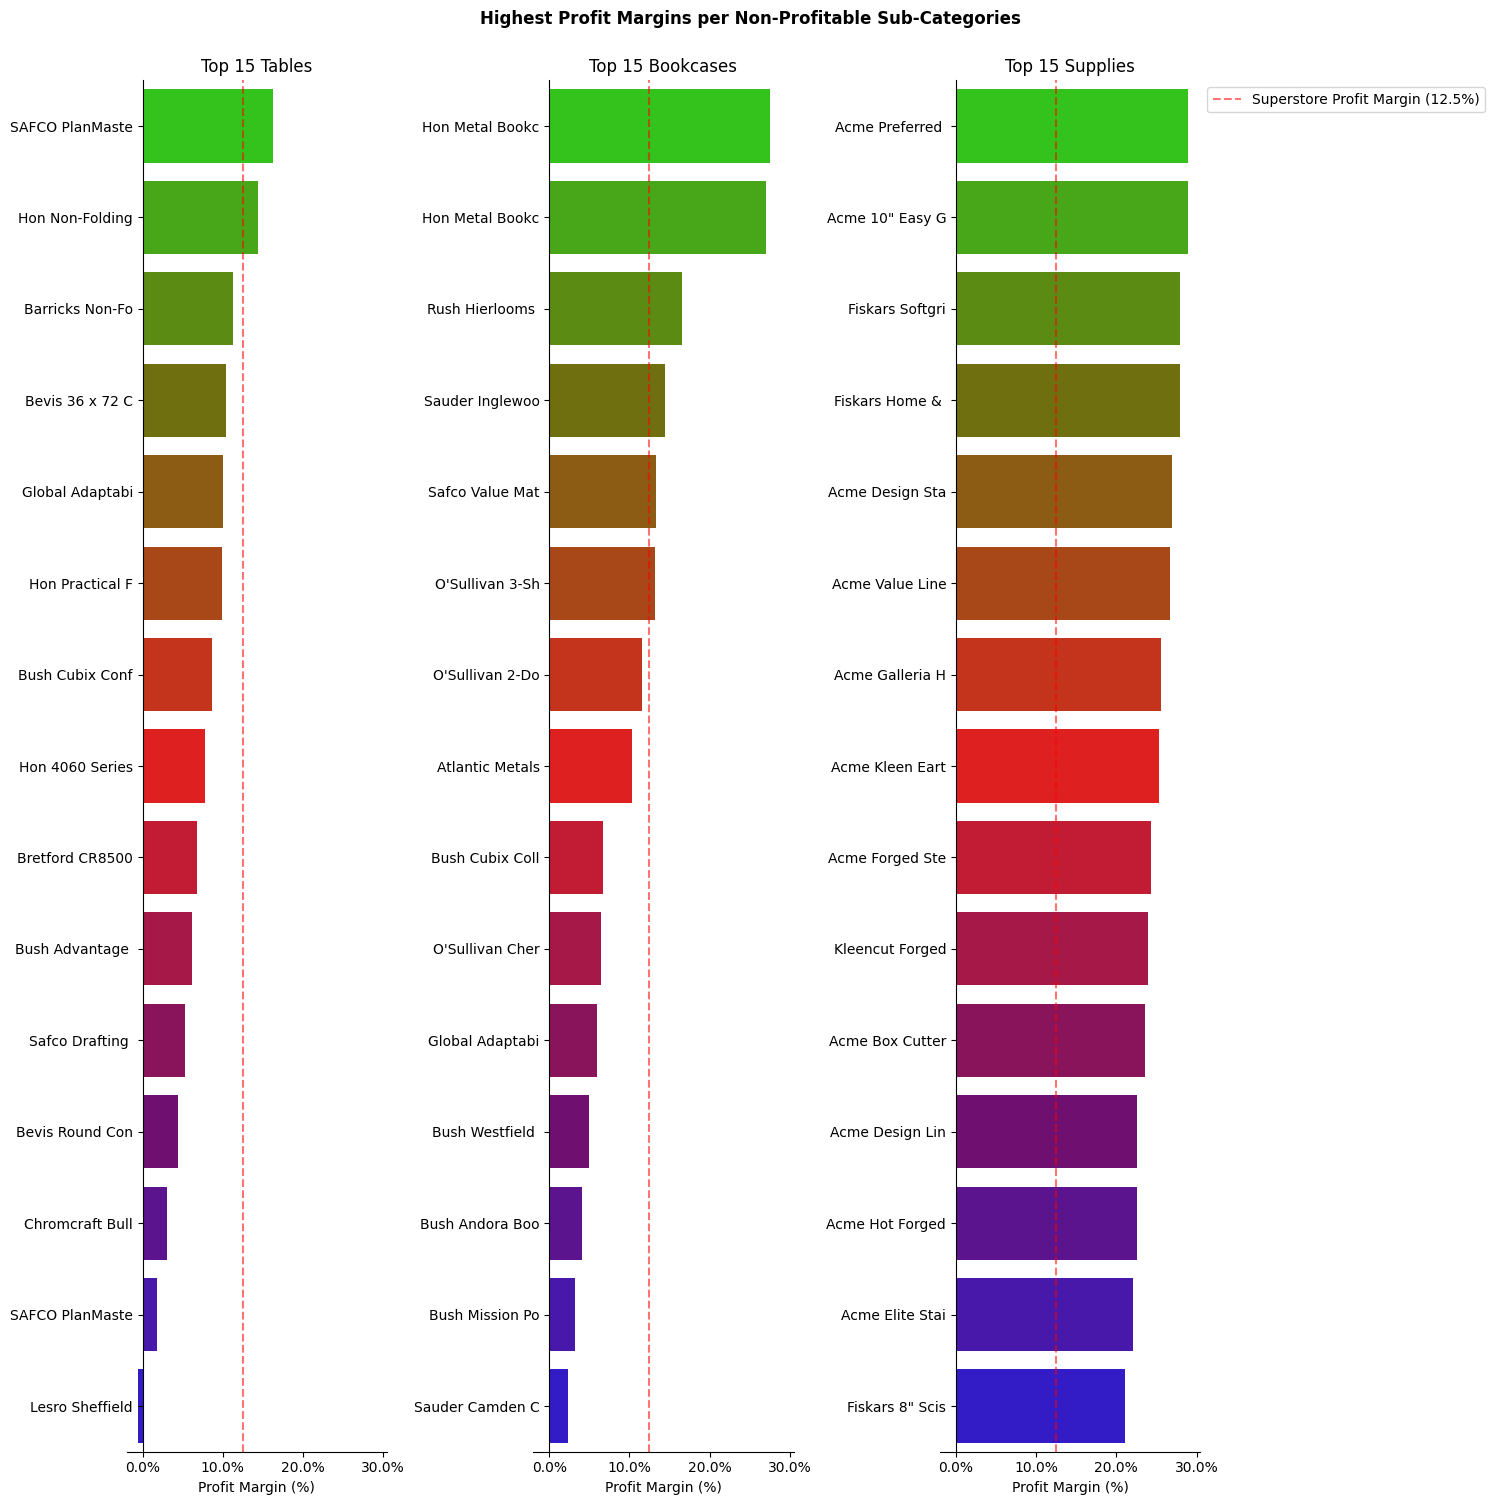

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,15), ncols=3, sharex=True)

#Plotting the profit margin per sub-category.
sns.barplot(y=tables.index[:15], x=tables["profit_margin"][:15], ax=ax1,
           dodge=False, palette="brg_r")
sns.barplot(y=bookcases.index[:15], x=bookcases["profit_margin"][:15], ax=ax2,
           dodge=False, palette="brg_r")
sns.barplot(y=supplies.index[:15], x=supplies["profit_margin"][:15], ax=ax3,
           dodge=False, palette="brg_r")


def fix_labels(ax):
    """
    Function for fixing the y-axis tick labels
    """
    
    labels = [label.get_text()[:15] for label in ax.get_ymajorticklabels()]
    ax.set_yticklabels(labels)
    
    return ax

#Fixing the y-axis tick labels for all charts.
fix_labels(ax1)
fix_labels(ax2)
fix_labels(ax3)

def format_bars(ax):
    """
    Function for making the appearance of all the charts equal and cleaning bar junk
    """
    
    ax.spines[["top","right"]].set_visible(False)
    ax.spines["left"].set_position("zero")
    ax.set(ylabel=None, xlabel="Profit Margin (%)")
    
    ax.axvline(mean_profit, color="red", label="Superstore Profit Margin (12.5%)", alpha=0.55, ls="--")
    
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
    
    return ax

#Formatting all the bars to have the same appearance
format_bars(ax1)
format_bars(ax2)
format_bars(ax3)

#Setting the titles for all charts.
ax1.set_title("Top 15 Tables")
ax2.set_title("Top 15 Bookcases")
ax3.set_title("Top 15 Supplies")

#Setting a joint-title for all charts.
fig.suptitle("Highest Profit Margins per Non-Profitable Sub-Categories", y=1, fontweight="bold")

#Setting the legend.
ax3.legend(bbox_to_anchor=(1,1))


fig.tight_layout()

Looking at the chart, we can see that Tables and Bookcases are two sub-categories where the company is really struggling to make a profit. Even the 15th highest margin item within Tables is being sold at a loss, which is not good. On the other hand, many of the items within Supplies have a high profit margin, but the sub-category as a whole is being sold at a loss. This is because the highest selling items are actually being sold at a loss, bringing the margin down for the entire sub-category. We can easily see this if we take a closer look at the data.

In [ ]:
#Converting to floats from scientific notation
supplies["profit"] = supplies["profit"].apply(lambda x: f"{x:.2f}")
supplies["profit_margin"] = supplies["profit_margin"].apply(lambda x: f"{x:.2f}")

supplies.sort_values(by="sales", ascending=False)[:5]

,postal_code,sales,quantity,discount,profit,profit_margin
product_name,,,,,,
High Speed Automatic Electric Letter Opener,266895,17030.312,11,0.2,-262.00,-0.02
Martin Yale Chadless Opener Electric Letter Opener,277104,16656.200,22,0.6,-1299.18,-0.08
Compact Automatic Electric Letter Opener,354385,2982.750,26,0.4,-57.27,-0.02
Premier Automatic Letter Opener,195746,2836.366,14,0.6,-427.86,-0.15
Premier Electric Letter Opener,405429,2641.608,24,0.6,-0.00,-0.00


As shown, the 5 highest selling items within Supplies are being sold at a negative margin. This in turn has brought down the profit margin for the entire sub-category

## Segment Analysis

<ipython-input-65-3355f06e27cd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_segment = df.groupby("segment").sum()


Text(0.0, 1.0, 'Share of Revenue by Segment')

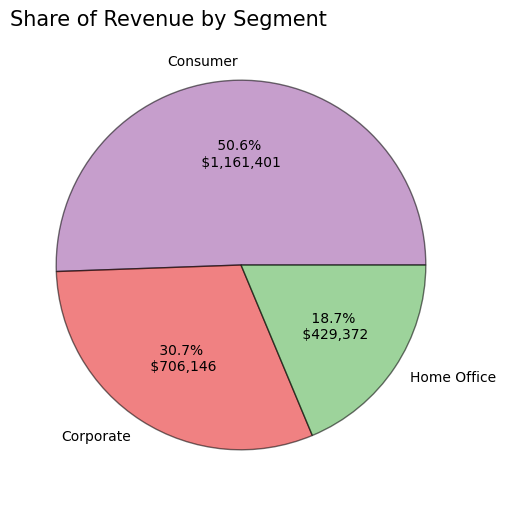

In [ ]:
#Grouping by segment and summing the numerical cols.
sales_by_segment = df.groupby("segment").sum()

#Using this the same colors can be applied for the segments across different charts.
segment_colors = ["#984ea3" if label == "Consumer" else "#e41a1c" if label == "Corporate" else "#4daf4a" for label in sales_by_segment.index]

fig1, ax1 = plt.subplots(figsize=(6,6))

#Pie chart with % share of revenue and annotating the actual sales value.
ax1.pie(sales_by_segment["sales"], labels=sales_by_segment.index,
wedgeprops={"linewidth":1, "edgecolor":"black", "alpha":0.55}, colors=segment_colors,
autopct=lambda p: f"{p: .1f}% \n ${p*np.sum(sales_by_segment['sales'])/100 :,.0f}")

#Setting the title for the pie chart
ax1.set_title("Share of Revenue by Segment", fontdict={"fontsize":15}, loc="left")

Text(0.0, 1.0, 'Profit Margin per Segment')

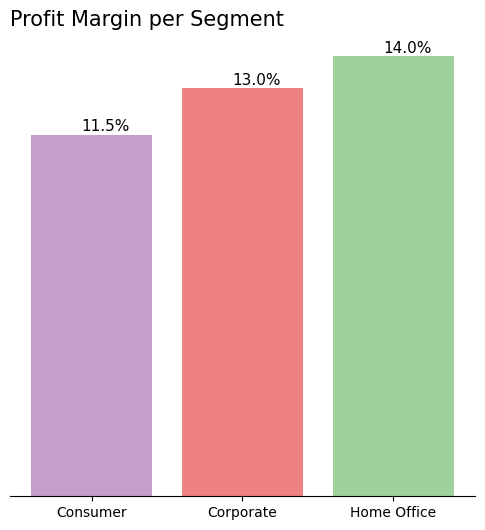

In [ ]:
#Preparing the data for visualization in a bar chart.
sales_by_segment["profit_margin"] = sales_by_segment["profit"] / sales_by_segment["sales"]
sales_by_segment = sales_by_segment[["quantity", "profit", "profit_margin"]].reset_index()

fig2, ax2 = plt.subplots(figsize=(6,6))

#Preparing the data for visualization in a bar chart.
ax2.bar(x=sales_by_segment["segment"], height=sales_by_segment["profit_margin"],
color=segment_colors, alpha=0.55)

#Removing bar junk
ax2.spines[["left", "top", "right"]].set_visible(False)
ax2.tick_params(left=None, labelleft=None)

#Annotating the bars.
for p in ax2.patches:
    x, _ = p.get_xy()
    
    ax2.annotate(f"{p.get_height()*100 :.1f}%", xy=(x+0.33, p.get_height()+0.001), size=11)

#Setting title for the bar chart.    
ax2.set_title("Profit Margin per Segment", fontdict={"fontsize":15}, loc="left")

<ipython-input-68-c1bf0f155306>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_and_category = df.groupby(["segment", "category"], as_index=False).sum()


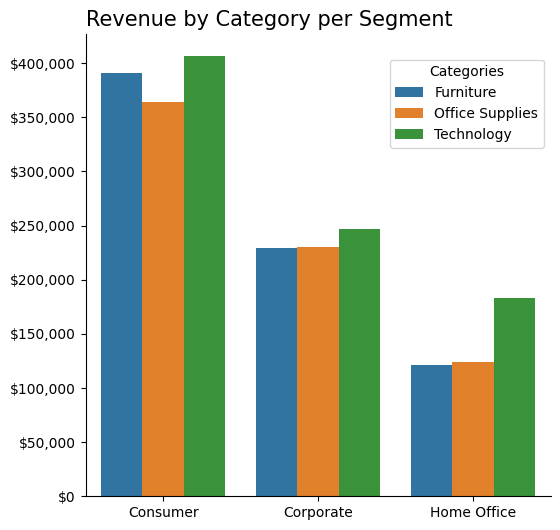

In [ ]:
#Grouping by segment and category.
segment_and_category = df.groupby(["segment", "category"], as_index=False).sum()

fig3, ax3 = plt.subplots(figsize=(6,6))

#Plotting the sales per segment and using the category as hue to show the division of sales between the categories.
sns.barplot(x=segment_and_category["segment"], y=segment_and_category["sales"], hue=segment_and_category["category"], ax=ax3)

#Removing bar junk
ax3.spines[["top", "right"]].set_visible(False)
ax3.set_title("Revenue by Category per Segment", fontdict={"fontsize":15}, loc="left")
ax3.set(xlabel=None, ylabel=None)

#Setting the format to USD on the y-axis.
ax3.yaxis.set_major_formatter("${x:,.0f}")

#Legend for the bar chart to show the segments in hue.
ax3.legend(title="Categories", loc="center right", bbox_to_anchor=(1, 0.85))

plt.show()

When we look at the Superstore's segments, it's clear that the Consumer segment is responsible for the most sales. However, the profit margin for this segment is slightly lower compared to the Corporate and Home Office segments. This might be because they sell a lot of Furniture, which has a lower profit margin than other categories.
Additionally, we can see that Technology is the top-selling category for each segment, and it has a higher profit margin on average.

## Geographical Analysis

<ipython-input-71-eefebf221f29>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_state = df.groupby("state", as_index=False).sum().sort_values(by="sales", ascending=False)


Text(0.5, 1.0, 'Revenue per State - Top 10')

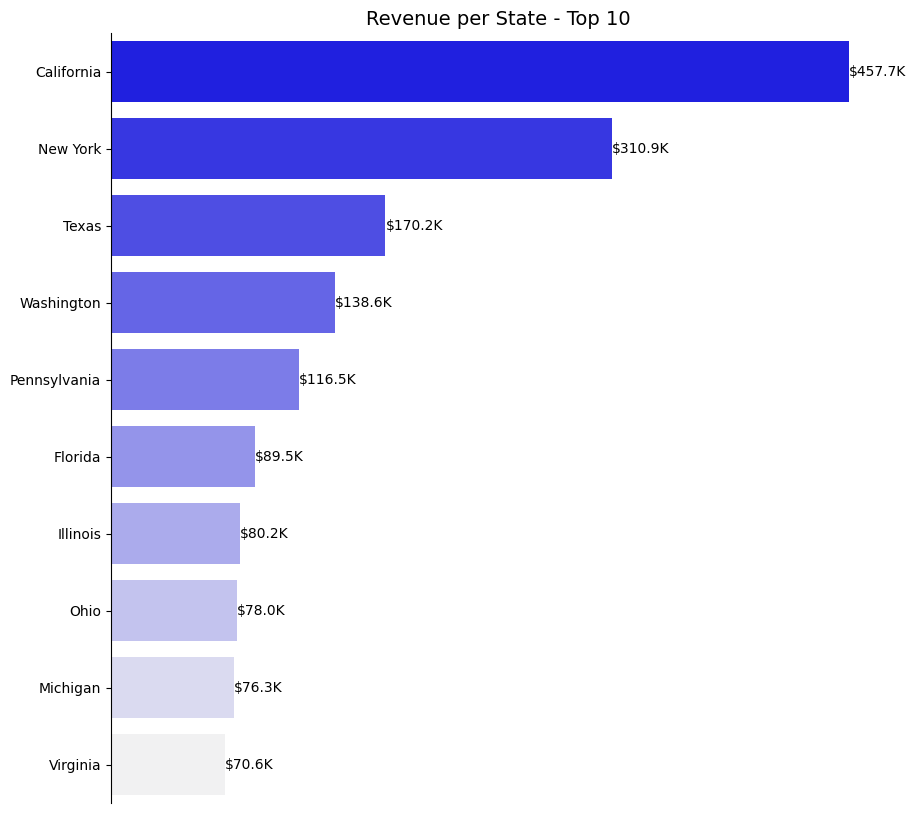

In [ ]:
#Grouping the data on state and sorting it based on the sales the states are making
sales_by_state = df.groupby("state", as_index=False).sum().sort_values(by="sales", ascending=False)

#Calculating profit margin per state.
sales_by_state["profit_margin"] = sales_by_state["profit"] / sales_by_state["sales"]


fig, ax = plt.subplots(figsize=(10,10))

#Plotting the sales per state.
sns.barplot(x=sales_by_state["sales"][:10], y=sales_by_state["state"][:10],
           ax=ax, palette="light:b_r")

#Annotating the sales.
for p in ax.patches:
    _, y = p.get_xy()
    
    ax.annotate(f"${p.get_width() / 1000 :.1f}K", xy=(p.get_width(), y+0.45))
    
#Removing bar junk
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.set(ylabel=None, xlabel=None)
ax.tick_params(labelbottom=None, bottom=None)

#Setting the title
ax.set_title("Revenue per State - Top 10", fontdict={"fontsize":14})

The sales data shows a large difference between the top three states and the rest. California is leading by 50% more sales than the state with the second highest sales, which is New York. Meanwhile, New York has 80% more sales than Texas, the state with the third highest sales.
As a result, it's crucial for the company to maintain strong sales in these three states, given their significant contribution to overall sales.

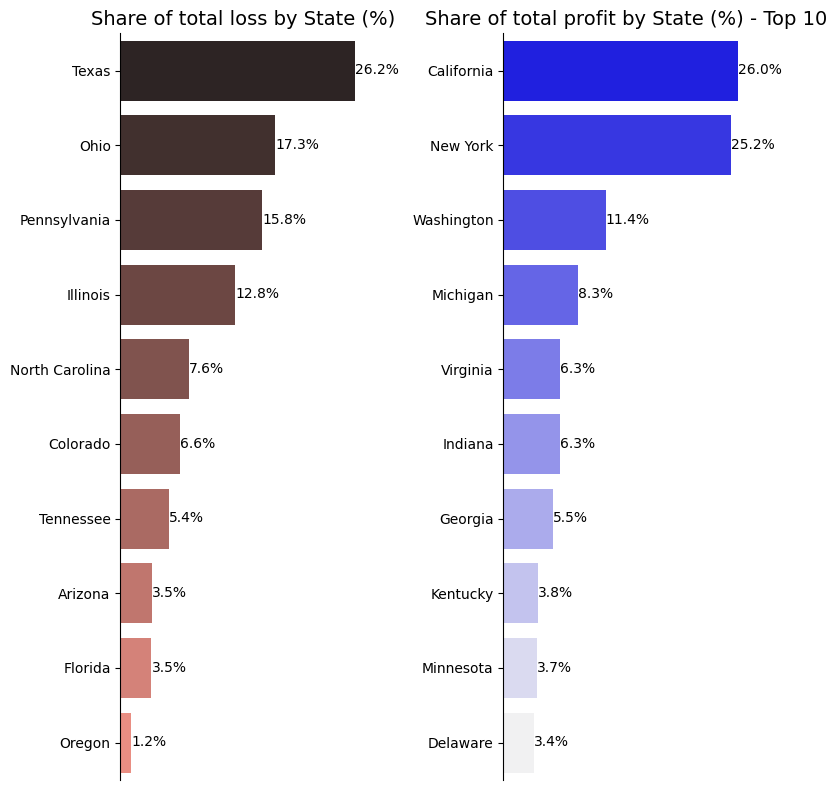

In [ ]:
#Filtering to only show states that on aggregate are making a loss. Sorting with the lowest values.
no_profit_states = sales_by_state[sales_by_state["profit"] < 0].sort_values(by="profit")[:10]

#Getting each state's share of the total loss.
no_profit_states["share_of_loss"] = no_profit_states["profit"] / no_profit_states["profit"].sum()

#Filtering to only show states that on aggregate are making a profit. Sorting with the highest values first.
profitable_states = sales_by_state[sales_by_state["profit"] > 0].sort_values(by="profit", ascending=False)[:10]

#Getting each state's share of the total profit.
profitable_states["share_of_profit"] = profitable_states["profit"] / profitable_states["profit"].sum()

fig, (ax1, ax2) = plt.subplots(figsize=(8, 8), ncols=2)

#Plotting the states where Superstore is making a loss.
sns.barplot(x=no_profit_states["share_of_loss"], y=no_profit_states["state"], 
            ax=ax1, palette="dark:salmon")

#Plotting the states where Superstore is making a profit
sns.barplot(x=profitable_states["share_of_profit"], y=profitable_states["state"],
           ax=ax2, palette="light:b_r")


def clean_hbar(ax):
    """
    Function to clean out bar junk for the provided bar charts
    """
    
    ax.spines[["bottom" ,"top", "right"]].set_visible(False)
    ax.set(ylabel=None, xlabel=None)
    ax.tick_params(bottom=False, labelbottom=False)
    
    return ax

def annotate_hbar(ax):
    """
    Function to annotate the % share of profit/loss on the provided bar charts"""
    
    for p in ax.patches:
        _, y = p.get_xy()
        ax.annotate(f"{p.get_width()*100 :.1f}%", xy=(p.get_width(), y+0.45))
    
    return ax

#Calling the function on the two charts.
annotate_hbar(ax1)
annotate_hbar(ax2)
    
#Calling the function on the two charts.
clean_hbar(ax1)
clean_hbar(ax2)
    
#Setting the title for the two charts.
ax1.set_title("Share of total loss by State (%)", fontdict={"fontsize":14})
ax2.set_title("Share of total profit by State (%) - Top 10", fontdict={"fontsize":14})

fig.tight_layout()

One key discovery is that some of the states where the company is making a lot of sales are actually causing a decrease in their overall profits. For example, even though Texas is the third highest state in terms of sales, it is responsible for over a quarter of the losses that the company is experiencing.

## Conclusion

The analysis helped the Superstore find out that some product categories, like Furniture, are being sold at low margins or even at a loss, while others, like Technology and Home Office, have higher margins. The Consumer segment is driving most of the sales and Technology is the top revenue contributor across all segments. Over half of the profit is coming from California and New York, making the store heavily reliant on those states for profits. Sales in Texas are actually causing more than 25% of the losses.

To address this, the Superstore can consider the following actions:

* Stop selling to unprofitable states.
* Discontinue non-profitable products.
* Conduct a customer basket analysis to determine if removing Tables and Bookcases would increase profits.
 * Check if these products are often purchased together with other more profitable items.
 * Assume that customers will not buy anything else if Tables and Bookcases are removed, and all baskets containing these items will be removed.